## Introduction

The Poisson distribution is usually introduced by its probability mass function (PMF).
It is then tied back to the binomial distribution by showing that a particular parameterization of the binomial distribution converges to the Poisson distribution.
This approach is somewhat unsatisfying: it does not give much insight into the Poisson distribution and, namely, why it is used to model certain phenomena.

In this short post, we avoid motivating the Poisson distribution by its PMF and instead *construct* it directly from the binomial distribution.

## Prerequisites

To understand this post, you will need to be familiar with the following concepts:

* [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF)
* [independent and identically distributed](https://en.wikipedia.org/wiki/Independent_and_identically_distributed_random_variables) (IID)
* [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution)
* [binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution)

## Construction by partitions

Let's start with a motivating example: we would like to model the number of emails you receive during a particular work day (e.g., between 9am and 5pm).
For convenience, we can normalize this interval of time by relabeling the start of the day 0 and the end 1.

While an email may arrive at any time between 0 and 1, it will be easier to start with a model in which emails arrive only at one of finitely many times between 0 and 1.
We do this by subdividing our day into $n$ uniformly sized partitions, each having length $h = 1 / n$:

We assume that inside each of these partitions, you receive at most one email.
Let $X_k = 1$ if you received an email between $(k-1)h$ and $kh$.
Otherwise, let $X_k = 0$.

Moreover, we assume that emails are independent (while this might be a lofty assumption, we leave it to the reader to create more complicated models) and that the probability of receiving an email in one partition is identical to that of receiving an email in another partition.
These assumptions can be neatly summarized in one sentence: the random variables $X_1, \ldots, X_n$ are IID.

The sum $S_n = X_1 + \cdots + X_n$ counts the total number of emails received in the work day.
Being a sum of IID Bernoulli random variables, $S_n$ has binomial distribution with $n$ trials and success probability $p = \mathbb{P}(X_1 = 1)$.
That is, $S_n$ has PMF
\begin{equation}
  f_{n, p}(s) = \binom{n}{s} p^s \left( 1 - p \right)^{n-s}.
\end{equation}

The expected number of emails received under this model is $\mathbb{E} S_n = np$.
We would like to pick $p$ such that the expected number of emails does not depend on the number of partitions $n$.
Our model would be a bit weird if the expected number of emails changed as a function of the number of partitions!
The only way to prevent this from happening is to pick $p = \lambda / n$ for some positive constant $\lambda$
(technically, it's possible that $p = \lambda / n > 1$, but we can always pick $n$ sufficiently large to obtain a valid probability).
Under this choice, the PMF becomes
\begin{equation}
  f_{n,\lambda/n}(s)
  = \binom{n}{s}\left(\frac{\lambda}{n}\right)^{s}\left(1-\frac{\lambda}{n}\right)^{n-s}
  = \frac{\lambda^{s}}{s!}\frac{1}{n^{n}}\frac{n!}{\left(n-s\right)!}\left(n-\lambda\right)^{n-s}.
\end{equation}

Next, note that
\begin{equation}
  \frac{1}{n^{n}}\frac{n!}{\left(n-s\right)!}\left(n-\lambda\right)^{n-s}
  = \frac{1}{n^{n}}\frac{n!}{\left(n-s\right)!}\sum_{k=0}^{n-s}\binom{n-s}{k}\left(-\lambda\right)^{k}n^{n-s-k}
  = \sum_{k=0}^{n-s}\frac{\left(-\lambda\right)^{k}}{k!}\frac{n\left(n-1\right)\cdots\left(n-s-k+1\right)}{n^{s+k}}.
\end{equation}
As we increase the number of partitions, our model becomes more and more realistic.
By taking a limit as the number of partitions goes to infinity, we obtain a model in which emails can be received at any point in time.
We make a new PMF $g_\lambda$ by taking this limit:
\begin{equation}
  g_\lambda(s)
  = \lim_{n}f_{n,\lambda/n}(s)
  = \frac{\lambda^s}{s!} \sum_{k \geq 0} \frac{\left(-\lambda\right)^k}{k!}
  = \frac{\lambda^{s}}{s!}e^{-\lambda}.
\end{equation}

The figure below plots $g_\lambda$ as a function of $s$.
When $\lambda$ is a positive integer, the modes are $\lambda$ and $\lambda - 1$, as can be seen in the plot.

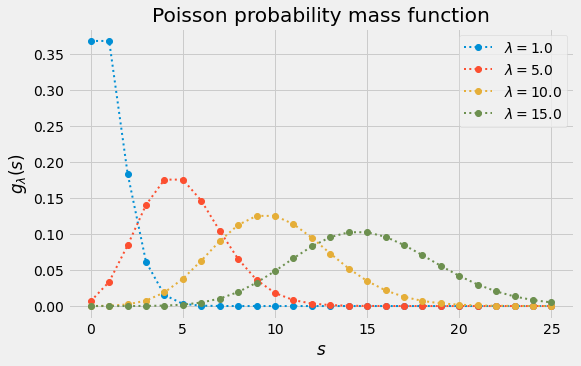

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use("fivethirtyeight")
mpl.rcParams["lines.linewidth"] = 2
plt.figure(figsize=(1.618 * 5.0, 5.0))
s = np.arange(25 + 1)
for r in [1., 5., 10., 15.]:
    g = r**s / np.array([np.math.factorial(si) for si in s]) * np.exp(-r)
    plt.plot(s, g, ':o', label=f'$\lambda = {r}$')
plt.xlabel('$s$')
plt.ylabel('$g_\lambda(s)$')
plt.legend()
_ = plt.title('Poisson probability mass function')

Our construction above suggests that the PMF $g_\lambda$ models the number of emails received per work day assuming that

* the receipt (or non-receipt) of one email does not affect future emails and
* the expected number of emails received is specified by the parameter $\lambda$.

Of course, we can replace "email" by any event and "work day" by any finite time horizon we are interested in, so long as the modeling assumptions above are sound.

In summary, any random variable with PMF $g_\lambda$ (for some positive value of $\lambda$) is said to be a *Poisson random variable* (or, equivalently, have a *Poisson distribution*).
All of our hard work above is not only a construction of the Poisson distribution but also a proof of the following result:

**Proposition (Binomial to Poisson).**
*Let $\lambda$ be a positive number.
The binomial distribution with $n$ trials and success probability $p = \lambda / n$ [converges](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution), as $n \rightarrow \infty$, to the Poisson distribution with parameter $\lambda$.*

## The usual rigmarole

For completeness, we also give the approach alluded to in the introduction of this article.
In particular, we take the definition of the Poisson distribution involving $g_\lambda$ as given and prove the proposition of the previous section using a more expedient approach.

We establish the proposition by showing that the [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)) (CF) of the binomial distribution conveges to that of the Poisson distribution and applying [Lévy's continuity theorem](https://en.wikipedia.org/wiki/L%C3%A9vy%27s_continuity_theorem).

*Proof (Binomial to Poisson)*.
Let's start by computing the CF of the Poisson distribution:
\begin{equation}
    \varphi_{\mathrm{Poisson}(\lambda)}(t)
    = e^{-\lambda}\sum_{k\geq0}\frac{1}{k!}\left(\lambda e^{it}\right)^{k}
    = e^{-\lambda}\exp\left(\lambda e^{it}\right)
    = \exp\left(\lambda \left(e^{it} - 1\right)\right).
\end{equation}
Let's now compute the CF of the binomial distribution with $n$ trials and success probability $p$.
The CF can be obtained by applying the [binomial theorem](https://en.wikipedia.org/wiki/Binomial_theorem):
\begin{equation}
    \varphi_{\mathrm{Binomial}(n, p)}(t)
    = \sum_{k\geq0}e^{itk}\binom{n}{k}p^{k}\left(1-p\right)^{n-k}
    = \sum_{k\geq0}\binom{n}{k}\left(pe^{it}\right)^{k}\left(1-p\right)^{n-k}\\
    = \left(1-p+pe^{it}\right)^{n}
    = \left(1+p\left(e^{it}-1\right)\right)^{n}.
\end{equation}
Setting $p = \lambda / n$ and taking limits in the above, we obtain the desired result:
\begin{equation}
  \lim_n \varphi_{\mathrm{Binomial}(n, \lambda / n)}(t)
  = \lim_n \left(
    \exp \left( \frac{\lambda}{n} \left( e^{it} - 1 \right) \right)
    + O \left( \frac{1}{n^2} \right)
  \right)^n
  = \varphi_{\mathrm{Poisson}(\lambda)}(t).
\end{equation}